In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import mean, std
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit

In [2]:
df = pd.read_csv('./data/processed_data/matches_sorted.csv')

In [3]:
# removes the index column
df.drop(df.columns[0], axis=1, inplace=True)

# removes rows with Null / Nan values
df.dropna(inplace=True)

# replace win with boolean
df['win'].replace({1: True, 0: False}, inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.4, random_state=0)

print(f"Training data length: {len(X_train)}")
print(f"Test data lenght: {len(X_test)}")
print(f"Sum: {len(X_test) + len(X_train)}")

Training data length: 93806
Test data lenght: 62538
Sum: 156344


In [5]:
kfold_cv = KFold(n_splits=10, random_state=0, shuffle=True)
shuffle_cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

model  = GaussianNB()

scores = cross_val_score(model, X_train, y_train, cv=shuffle_cv)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.782 (0.006)


In [6]:
model_all = GaussianNB()
model_all.fit(X_train, y_train)

predicted = model_all.predict(X_test)
acc = accuracy_score(y_test, predicted)

print(f'Test accuracy score: {acc}')

Test accuracy score: 0.7788064856567207


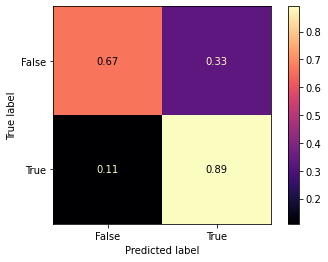

In [25]:
plot_confusion_matrix(model_all, X_test, y_test, cmap='magma', normalize='true')
plt.savefig('figs/naive_bayes.png')
plt.show()
